1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


Eigenvalues and eigenvectors of covariance matrix:
[ 2.70097717e+01+0.j -3.89811994e-16+0.j  1.96616340e+00+0.j]
[[-0.11798305 -0.81649658  0.56516664]
 [-0.5742019  -0.40824829 -0.70966577]
 [-0.81016799  0.40824829  0.42066751]]

Eigenvalues and eigenvectors of covariance matrix using SVD:
[2.70446862e+01 1.96619626e+00 1.92437039e-31]
[[-0.1180072   0.5651616  -0.81649658]
 [-0.57417157 -0.70969031 -0.40824829]
 [-0.81018597  0.42063289  0.40824829]]

1st PC: 93.22255618526354 %
2nd PC: 6.777443814736459 %
1st + 2nd PCs: 100.0 %


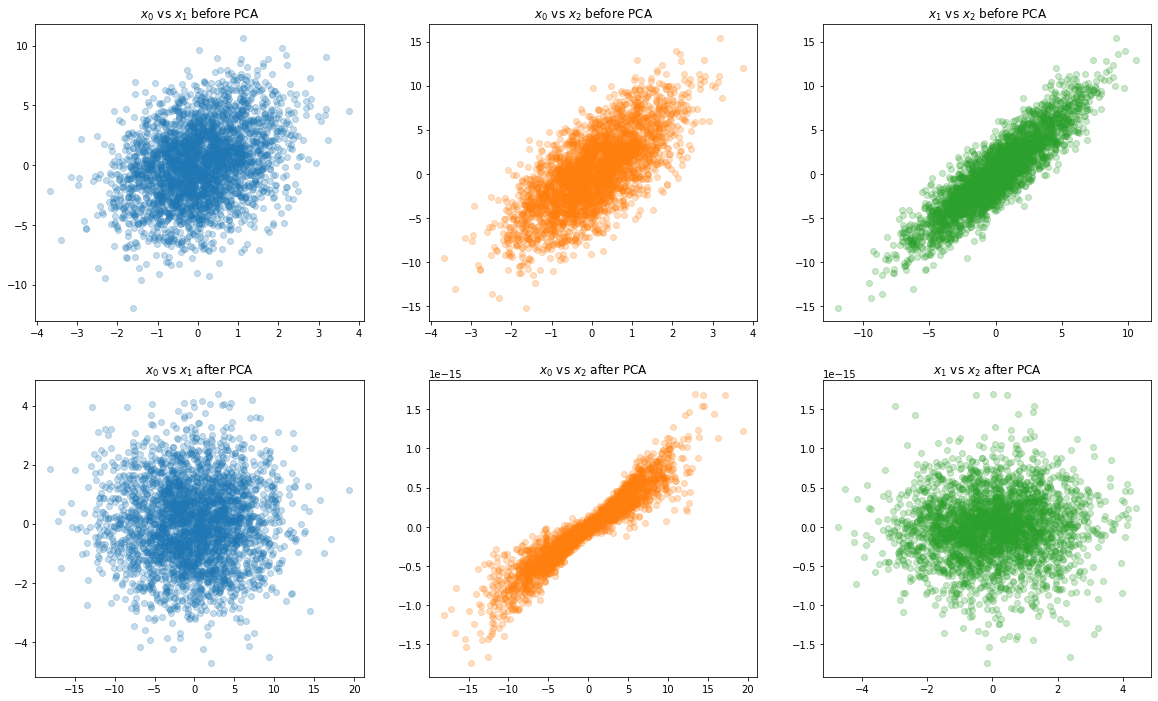

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from scipy import linalg as la

N = 3000

x1 = np.random.normal(loc=0, scale=1, size=N)
x2 = x1 + np.random.normal(loc=0, scale=3, size=N)
x3 = 2*x1 + x2

X = np.array([x1, x2, x3])

# eigenvectors cov matrix:
covX = np.cov(X)

l, V = la.eig(covX)
print("Eigenvalues and eigenvectors of covariance matrix:",l, V, sep='\n')

# SVD:
U, spectrum, Vt = la.svd(X)

l_svd = spectrum**2/(N-1)
V_svd = U
print("","Eigenvalues and eigenvectors of covariance matrix using SVD:",l_svd, V_svd, sep='\n')

# % of total dataset's variability:

l_sum = np.sum(l_svd)
# l_sort = np.sort(l_svd)[::-1]

print("\n1st PC:",100*l_svd[0]/l_sum,"%")
print("2nd PC:",100*l_svd[1]/l_sum,"%")
print("1st + 2nd PCs:",100*(l_svd[0]+l_svd[1])/l_sum,"%")

# PCA
# rotate all the data points accordingly to the new base
Xp = np.dot(V_svd.T, X)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

plot_ix = ((0,1), (0,2), (1,2))

for ix, pl_i in enumerate(plot_ix):
    ax[0][ix].scatter(X[pl_i[0]],X[pl_i[1]], alpha=0.25, c='C{}'.format(ix))
    ax[1][ix].scatter(Xp[pl_i[0]],Xp[pl_i[1]], alpha=0.25, c='C{}'.format(ix))
    ax[0][ix].set_title("$x_{}$ vs $x_{}$ before PCA".format(pl_i[0], pl_i[1]))
    ax[1][ix].set_title("$x_{}$ vs $x_{}$ after PCA".format(pl_i[0], pl_i[1]))

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.



1st PC: 99.99925112683313 %
2nd PC: 0.0007488731668667714 %

1st PC: 99.99889522419315 %
2nd PC: 0.0011047758068461163 %

1st PC: 99.99896590926903 %
2nd PC: 0.0010340907309680258 %


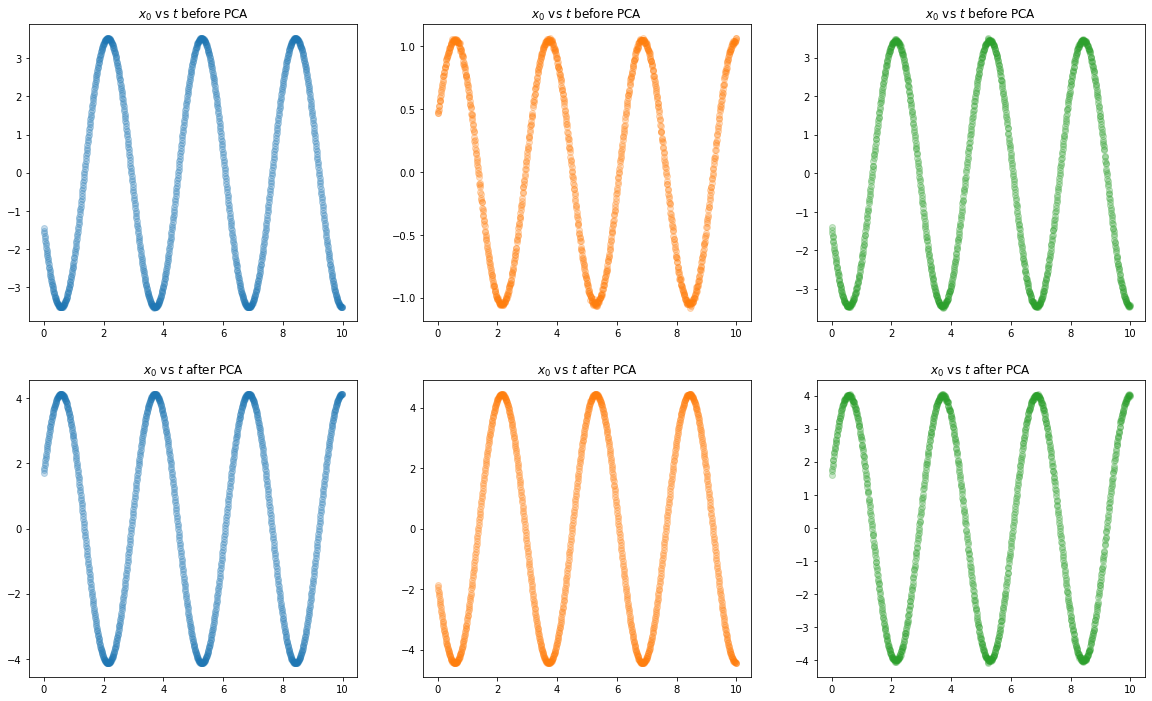

In [19]:
from scipy.spatial.transform import Rotation as R

# V = R.from_euler('xyz', [a,b,c]).as_matrix()

t = np.arange(0,10,0.01)
A = 2
w = 2
phi = 2

x = A*np.cos(w*t + phi)
y = np.random.normal(loc =0,scale=0.01, size=1000)
z = np.zeros(1000)

X = [np.array([x, y, z]),]

# Euler angles
angles = 2*np.pi*np.random.random((2,3))
# Rotation matrices
V = [R.from_euler('xyz', angles[i]).as_matrix() for i in range(2)]

# Xrot = [np.dot(V[i].T, X) for i in range(2)]

X1 = np.dot(V[0].T, X)
X2 = np.dot(V[1].T, X)
X += X1 + X2

def SVD_PCA(M):
    # SVD:
    U, spectrum, Vt = la.svd(M)
    N = len(M[0])

    l_svd = spectrum**2/(N-1)
    V_svd = U
    # print("","Eigenvalues and eigenvectors of covariance matrix using SVD:",l_svd, V_svd, sep='\n')

    # % of total dataset's variability:

    l_sum = np.sum(l_svd)
    # l_sort = np.sort(l_svd)[::-1]

    print("\n1st PC:",100*l_svd[0]/l_sum,"%")
    print("2nd PC:",100*l_svd[1]/l_sum,"%")

    # PCA
    # rotate all the data points accordingly to the new base
    return np.dot(V_svd.T, M)
    
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

for i in range(3):
    ax[0][i].scatter(t, X[i][0], alpha=0.25, c='C{}'.format(i))
    ax[1][i].scatter(t, SVD_PCA(X[i])[0], alpha=0.25, c='C{}'.format(i))
    ax[0][i].set_title("$x_0$ vs $t$ before PCA")
    ax[1][i].set_title("$x_0$ vs $t$ after PCA")

In [3]:
#PCA on all cameras at once

from scipy.spatial.transform import Rotation as R

# V = R.from_euler('xyz', [a,b,c]).as_matrix()

t = np.arange(0,10,0.01)
A = 2
w = 2
phi = 2

x = A*np.cos(w*t + phi)
y = np.random.normal(loc =0,scale=0.01, size=1000)
z = np.zeros(1000)

X = [np.array([x, y, z]),]

# Euler angles
angles = 2*np.pi*np.random.random((2,3))
# Rotation matrices
V = [R.from_euler('xyz', angles[i]).as_matrix() for i in range(2)]

# Xrot = [np.dot(V[i].T, X) for i in range(2)]

X1 = np.dot(V[0].T, X)
X2 = np.dot(V[1].T, X)
# X = np.row_stack([x, y, z, X1[0], X1[1], X1[2], X2[0], X2[1], X2[2]])
X = np.row_stack([x, y, z, *X1, *X2])

def SVD_PCA(M):
    # SVD:
    U, spectrum, Vt = la.svd(M)
    N = 1000

    l_svd = spectrum**2/(N-1)
    V_svd = U
    # print("","Eigenvalues and eigenvectors of covariance matrix using SVD:",l_svd, V_svd, sep='\n')

    # % of total dataset's variability:

    l_sum = np.sum(l_svd)
    # l_sort = np.sort(l_svd)[::-1]

    print("\n1st PC:",100*l_svd[0]/l_sum,"%")
    print("2nd PC:",100*l_svd[1]/l_sum,"%")

    # PCA
    # rotate all the data points accordingly to the new base
#     return np.dot(V_svd.T, M)

SVD_PCA(X)
    
# fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

# for i in range(3):
#     ax[0][i].scatter(t, X[i][0], alpha=0.25, c='C{}'.format(i))
#     ax[1][i].scatter(t, SVD_PCA(X[i])[0], alpha=0.25, c='C{}'.format(i))
#     ax[0][i].set_title("$x_0$ vs $t$ before PCA")
#     ax[1][i].set_title("$x_0$ vs $t$ after PCA")


1st PC: 99.99523727110477 %
2nd PC: 0.0047627288952296004 %



1st PC: 99.99511269887779 %
2nd PC: 0.004887301122208195 %

1st PC: 99.99490669091361 %
2nd PC: 0.005093309086382156 %

1st PC: 99.99490669091361 %
2nd PC: 0.005093309086382158 %


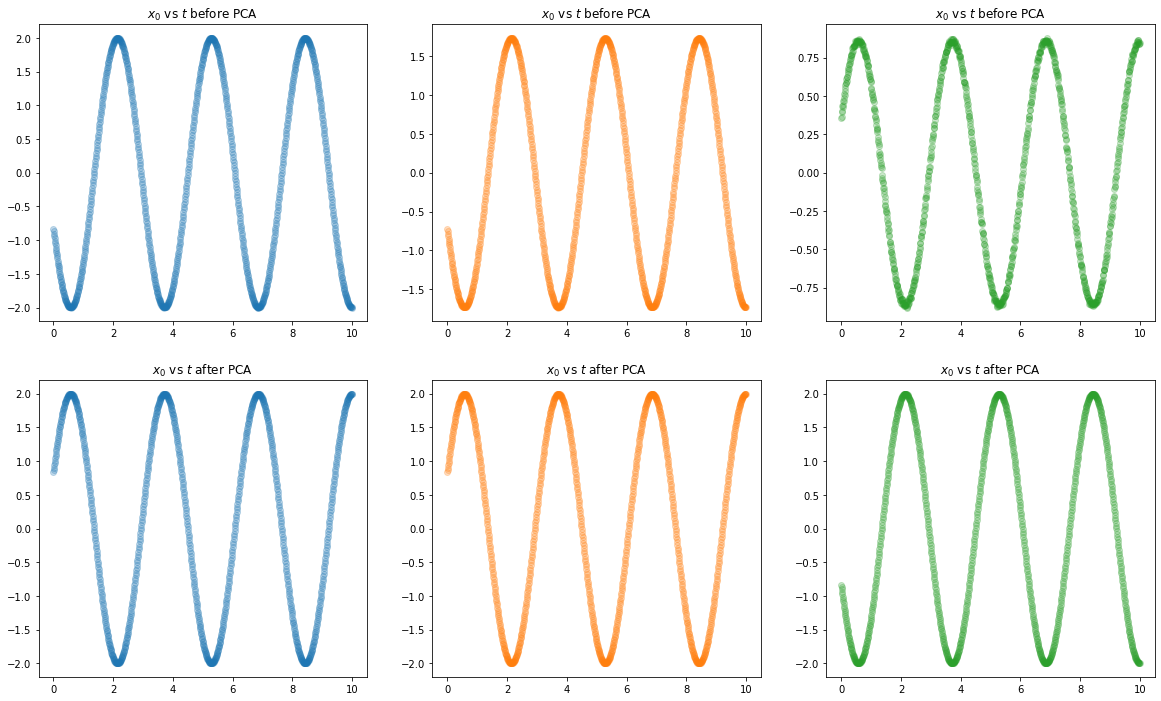

In [33]:
def rot(dat,th,ph):
    Ry = np.array([[np.cos(th),0,np.sin(th)],[0,1,0],[-np.sin(th),0,np.cos(th)]])
    Rz = np.array([[np.cos(ph),-np.sin(ph),0],[np.sin(ph),np.cos(ph),0],[0,0,1]])
    return np.dot(Rz,np.dot(Ry,dat))

t = np.arange(0,10,0.01)
A = 2
w = 2
phi = 2

x = A*np.cos(w*t + phi)
y = np.random.normal(loc =0,scale=0.01, size=1000)
z = np.zeros(1000)

X = [np.array([x, y, z]),]

Xrot = [rot(X0, np.pi*np.random.random(1)[0], 2*np.pi*np.random.random(1)[0]) for i in range(2)]

X += Xrot

def SVD_PCA(M):
    # SVD:
    U, spectrum, Vt = la.svd(M)
    N = len(M[0])

    l_svd = spectrum**2/(N-1)
    V_svd = U
    # print("","Eigenvalues and eigenvectors of covariance matrix using SVD:",l_svd, V_svd, sep='\n')

    # % of total dataset's variability:

    l_sum = np.sum(l_svd)
    # l_sort = np.sort(l_svd)[::-1]

    print("\n1st PC:",100*l_svd[0]/l_sum,"%")
    print("2nd PC:",100*l_svd[1]/l_sum,"%")

    # PCA
    # rotate all the data points accordingly to the new base
    return np.dot(V_svd.T, M)
    
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

for i in range(3):
    ax[0][i].scatter(t, X[i][0], alpha=0.25, c='C{}'.format(i))
    ax[1][i].scatter(t, SVD_PCA(X[i])[0], alpha=0.25, c='C{}'.format(i))
    ax[0][i].set_title("$x_0$ vs $t$ before PCA")
    ax[1][i].set_title("$x_0$ vs $t$ after PCA")

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 